<h2>Cabecera</h2>

<p>El programa realiza 6 procesos de normalización a 2 archivos de texto, uno en inglés y otro en español</p>
<p>Luna Zamora Juan Antonio
    5BV1
    Ingeniería en Inteligencia Artificial
    Última modificación: 13/03/2024
    El programa necesita instalar 2 librerias, spiCy y matplotlib (pip install -nombre-)
    spicy para el procesamiento del texto a través de ciertas funciones
    matplotlib para poder graficar los histogramas de frecuencia y longitud
    El programa necesita tener los 2 archivos de texto con nombre "doc_esp.txt" y "doc_eng.txt"
    Dentro de las funciones que tiene el programa son las siguientes:
    -exploratory_analysis(documento, nlp) la cual recibe el archivo de texto y los diccionarios y funciones de la libreria spiCy
    -plot_unique_tokens(unique_tokens) la cual recibe la longitud de los tokens unicos y grafica (se hizo esta función aparte para que la función de arriba no se viera tan saturada)
    -stem_tokens(tokens) se realizo como metodo alternativo para poder hacer stemming, dado que spiCy no cuenta con una propia
    -lemmatize_tokens(tokens) se replico la función de arriba pero para poder hacer lematización
    </p>

<h1>Importar bibliotecas</h1>

In [14]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from spacy.lang.es.stop_words import STOP_WORDS

<h1>Cargar el modelo de spaCy en Español e inglés</h1>

In [15]:
nlp_es = spacy.load('es_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

<h1>Cargar los archivos de texto</h1>

In [4]:
with open('doc_esp.txt', 'r', encoding='utf-8') as file:
    doc_esp = file.read()

with open('doc_eng.txt', 'r', encoding='utf-8') as file:
    doc_eng = file.read()


<h1>Verificar que el texto se almacenó correctamente</h1>

In [5]:
print("Contenido del documento en español:")
print(doc_esp)
print("\nContenido del documento en inglés:")
print(doc_eng)

Contenido del documento en español:
Por lo general, no pensamos en las complejidades de nuestros propios lenguajes. Es un
comportamiento intuitivo que se utiliza para transmitir información y significados con señales
semánticas, como palabras, signos o imágenes. Se dice que es más fácil aprender un idioma
nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado,
casi como caminar. Asimismo, el idioma no sigue un conjunto de reglas estricto, ya que las
excepciones son innumerables, por ejemplo: los sustantivos que terminan con ‘a’ son femeninos,
pero no es el caso del sustantivo ‘el problema‘. Sin embargo, a los humanos nos resulta natural
es extremadamente difícil para las computadoras, ya que tienen que lidiar con una gran cantidad
de datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención
real. Es por eso que el aprendizaje automático y la inteligencia artificial (IA) ganan fuerza y llaman
la atención, puesto 

# Función para realizar el análisis exploratorio de texto

In [6]:
def exploratory_analysis(documento, nlp):
    # Tokenizar el texto y procesar el documento
    doc = nlp(documento)
    
    # Obtener el número total de tokens en el texto
    total_tokens = len(doc)
    print("Total tokens:")
    print(total_tokens)
    
    # Obtener el número de tokens únicos en el texto
    unique_tokens = set(token.text for token in doc)
    num_unique_tokens = len(unique_tokens)
    print("\nTotal tokens únicos:")
    print(num_unique_tokens)
    
    # Obtener los tokens más comunes (top 15)
    token_counter = Counter(token.text for token in doc)
    most_common_tokens = token_counter.most_common(15)
    
    # Graficar los tokens más comunes
    tokens, frequencies = zip(*most_common_tokens)
    plt.figure(figsize=(10, 6))
    plt.bar(tokens, frequencies)
    plt.title('Tokens más comunes')
    plt.xlabel('Tokens')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

    # Graficar los tokens únicos
    plot_unique_tokens(unique_tokens)

    return total_tokens, num_unique_tokens, most_common_tokens

def plot_unique_tokens(unique_tokens):
    # Crear una gráfica de barras para mostrar el número de tokens únicos por longitud de token
    token_lengths = [len(token) for token in unique_tokens]
    unique_token_counter = Counter(token_lengths)
    sorted_lengths = sorted(unique_token_counter.keys())
    frequencies = [unique_token_counter[length] for length in sorted_lengths]

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_lengths, frequencies)
    plt.title('Distribución de longitud de tokens únicos')
    plt.xlabel('Longitud del token')
    plt.ylabel('Frecuencia')
    plt.show()


# Realizar el análisis exploratorio para el documento en español

In [7]:
total_tokens_es, num_unique_tokens_es, most_common_tokens_es = exploratory_analysis(doc_esp, nlp_es)

NameError: name 'nlp_es' is not defined

# Realizar el análisis exploratorio para el documento en inglés

Total tokens:
399

Total tokens únicos:
208


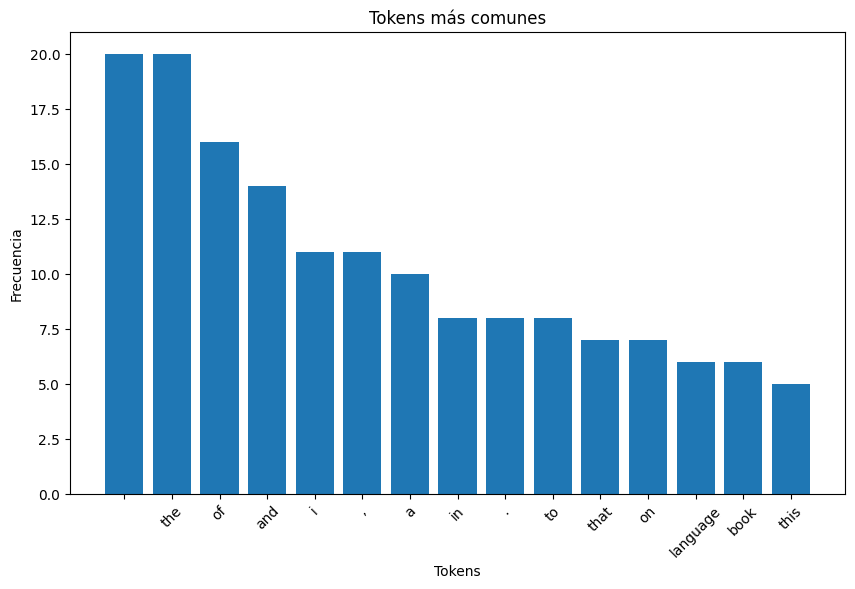

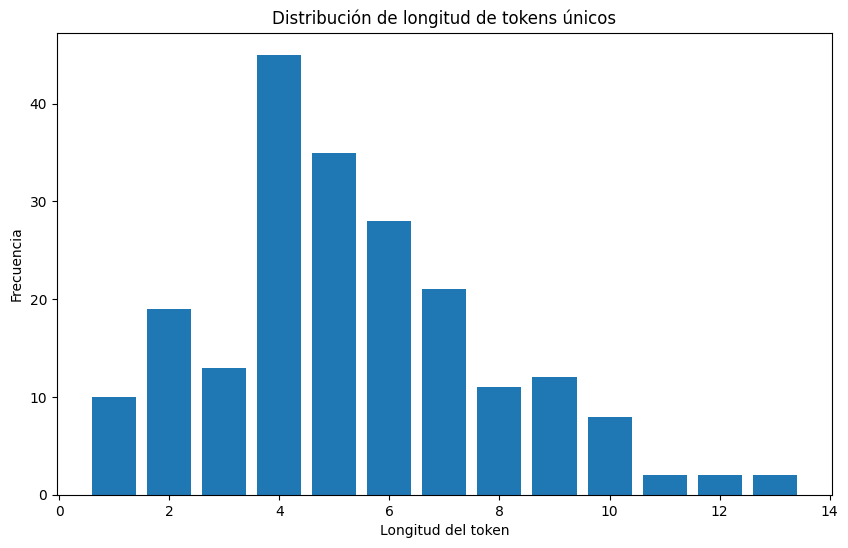

In [33]:
total_tokens_en, num_unique_tokens_en, most_common_tokens_en = exploratory_analysis(doc_eng, nlp_en)

<h1>LowerCasing</h1>

In [11]:
doc_esp=doc_esp.lower()
doc_eng=doc_eng.lower()
print("Contenido del documento en español:")
print(doc_esp)
print("\nContenido del documento en inglés:")
print(doc_eng)


Contenido del documento en español:
por lo general, no pensamos en las complejidades de nuestros propios lenguajes. es un
comportamiento intuitivo que se utiliza para transmitir información y significados con señales
semánticas, como palabras, signos o imágenes. se dice que es más fácil aprender un idioma
nuevo cuando somos adolescentes porque se trata de un comportamiento repetible y entrenado,
casi como caminar. asimismo, el idioma no sigue un conjunto de reglas estricto, ya que las
excepciones son innumerables, por ejemplo: los sustantivos que terminan con ‘a’ son femeninos,
pero no es el caso del sustantivo ‘el problema‘. sin embargo, a los humanos nos resulta natural
es extremadamente difícil para las computadoras, ya que tienen que lidiar con una gran cantidad
de datos no estructurados, la ausencia de reglas formales y la falta de un contexto o una intención
real. es por eso que el aprendizaje automático y la inteligencia artificial (ia) ganan fuerza y llaman
la atención, puesto 

<h1>Tokenización</h1>

In [16]:
doc_esp = nlp_es(doc_esp)
tokens_esp = [token.text for token in doc_esp if not token.is_punct]
doc_eng = nlp_en(doc_eng)
tokens_eng = [token.text for token in doc_eng if not token.is_punct]
print("Contenido del documento en español:")
print(tokens_esp)
print("\nContenido del documento en inglés:")
print(tokens_eng)

Contenido del documento en español:
['por', 'lo', 'general', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', 'es', 'un', '\n', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', '\n', 'semánticas', 'como', 'palabras', 'signos', 'o', 'imágenes', 'se', 'dice', 'que', 'es', 'más', 'fácil', 'aprender', 'un', 'idioma', '\n', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'se', 'trata', 'de', 'un', 'comportamiento', 'repetible', 'y', 'entrenado', '\n', 'casi', 'como', 'caminar', 'asimismo', 'el', 'idioma', 'no', 'sigue', 'un', 'conjunto', 'de', 'reglas', 'estricto', 'ya', 'que', 'las', '\n', 'excepciones', 'son', 'innumerables', 'por', 'ejemplo', 'los', 'sustantivos', 'que', 'terminan', 'con', 'a', 'son', 'femeninos', '\n', 'pero', 'no', 'es', 'el', 'caso', 'del', 'sustantivo', 'el', 'problema', 'sin', 'embargo', 'a', 'los', 'humanos', 'nos', 'resulta', 'natural', 

<h1>Eliminación de caracteres especiales</h1>

In [17]:
tokens_esp = [token for token in tokens_esp if token.isalnum()]
tokens_eng = [token for token in tokens_eng if token.isalnum()]
print("Contenido del documento en español:")
print(tokens_esp)
print("\nContenido del documento en inglés:")
print(tokens_eng)

Contenido del documento en español:
['por', 'lo', 'general', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', 'es', 'un', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', 'semánticas', 'como', 'palabras', 'signos', 'o', 'imágenes', 'se', 'dice', 'que', 'es', 'más', 'fácil', 'aprender', 'un', 'idioma', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'se', 'trata', 'de', 'un', 'comportamiento', 'repetible', 'y', 'entrenado', 'casi', 'como', 'caminar', 'asimismo', 'el', 'idioma', 'no', 'sigue', 'un', 'conjunto', 'de', 'reglas', 'estricto', 'ya', 'que', 'las', 'excepciones', 'son', 'innumerables', 'por', 'ejemplo', 'los', 'sustantivos', 'que', 'terminan', 'con', 'a', 'son', 'femeninos', 'pero', 'no', 'es', 'el', 'caso', 'del', 'sustantivo', 'el', 'problema', 'sin', 'embargo', 'a', 'los', 'humanos', 'nos', 'resulta', 'natural', 'es', 'extremadamente', 'difícil', '

<h1>Eliminación de StopWords</h1>

In [18]:
tokens_esp = [token for token in tokens_esp if token not in STOP_WORDS]
tokens_eng = [token for token in tokens_eng if token not in STOP_WORDS]
print("Contenido del documento en español:")
print(tokens_esp)
print("\nContenido del documento en inglés:")
print(tokens_eng)

Contenido del documento en español:
['general', 'pensamos', 'complejidades', 'lenguajes', 'comportamiento', 'intuitivo', 'utiliza', 'transmitir', 'información', 'significados', 'señales', 'semánticas', 'palabras', 'signos', 'imágenes', 'fácil', 'aprender', 'idioma', 'adolescentes', 'comportamiento', 'repetible', 'entrenado', 'caminar', 'asimismo', 'idioma', 'conjunto', 'reglas', 'estricto', 'excepciones', 'innumerables', 'ejemplo', 'sustantivos', 'terminan', 'femeninos', 'caso', 'sustantivo', 'problema', 'humanos', 'resulta', 'natural', 'extremadamente', 'difícil', 'computadoras', 'lidiar', 'cantidad', 'datos', 'estructurados', 'ausencia', 'reglas', 'formales', 'falta', 'contexto', 'intención', 'real', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'ia', 'ganan', 'fuerza', 'llaman', 'atención', 'puesto', 'humanos', 'dependen', 'sistemas', 'informáticos', 'comunicarse', 'tareas', 'medida', 'ia', 'vuelve', 'sofisticada', 'procesamiento', 'lenguaje', 'natural', 'pln', 'procesa

<h1>Stemming</h1>

In [19]:
# Definir función para stemmatizar los tokens en español
def stem_tokens(tokens):
    doc = ' '.join(tokens)  # Convertir la lista de tokens de nuevo a una cadena de texto
    doc = nlp_es(doc)
    stems = [token.lemma_ for token in doc]
    return stems

# Stemmatizar los tokens
stems_esp = stem_tokens(tokens_esp)
stems_eng = stem_tokens(tokens_eng)
print("Contenido del documento en español:")
print(stems_esp)
print("\nContenido del documento en inglés:")
print(stems_eng)

Contenido del documento en español:
['general', 'pensar', 'complejidad', 'lenguajes', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imagen', 'fácil', 'aprender', 'idioma', 'adolescente', 'comportamiento', 'repetible', 'entrenado', 'caminar', 'asimismo', 'idioma', 'conjunto', 'regla', 'estricto', 'excepción', 'innumerable', 'ejemplo', 'sustantivo', 'terminar', 'femenino', 'caso', 'sustantivo', 'problema', 'humano', 'resultar', 'natural', 'extremadamente', 'difícil', 'computadora', 'lidiar', 'cantidad', 'dato', 'estructurado', 'ausencia', 'regla', 'formal', 'faltar', 'contexto', 'intención', 'real', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'ia', 'ganar', 'fuerza', 'llamar', 'atención', 'puesto', 'humano', 'depender', 'sistema', 'informático', 'comunicar él', 'tarea', 'medido', 'ia', 'volver', 'sofisticado', 'procesamiento', 'lenguaje', 'natural', 'pln', 'procesamiento', 'lenguaje', 'natu

<h1>Lematización</h1>

In [20]:
def lemmatize_tokens(tokens):
    doc = ' '.join(tokens)  # Convertir la lista de tokens de nuevo a una cadena de texto
    doc = nlp_es(doc)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

# Lematizar los tokens
lemmas_esp = lemmatize_tokens(stems_esp)
lemmas_eng = lemmatize_tokens(stems_eng)
print("Contenido del documento en español:")
print(lemmas_esp)
print("\nContenido del documento en inglés:")
print(lemmas_eng)

Contenido del documento en español:
['general', 'pensar', 'complejidad', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imagen', 'fácil', 'aprender', 'idioma', 'adolescente', 'comportamiento', 'repetible', 'entrenado', 'caminar', 'asimismo', 'idioma', 'conjunto', 'regla', 'estricto', 'excepción', 'innumerable', 'ejemplo', 'sustantivo', 'terminar', 'femenino', 'caso', 'sustantivo', 'problema', 'humano', 'resultar', 'natural', 'extremadamente', 'difícil', 'computadora', 'lidiar', 'cantidad', 'dato', 'estructurado', 'ausencia', 'reglo', 'formal', 'faltar', 'contexto', 'intención', 'real', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'io', 'ganar', 'fuerza', 'llamar', 'atención', 'puesto', 'humano', 'depender', 'sistema', 'informático', 'comunicar', 'él', 'tareo', 'medido', 'ia', 'volver', 'sofisticado', 'procesamiento', 'lenguaje', 'natural', 'pln', 'procesamiento', 'lenguaje', 'na

<h1>Exploración de texto posterior a Normalización</h1>

Total tokens:
141

Total tokens únicos:
116


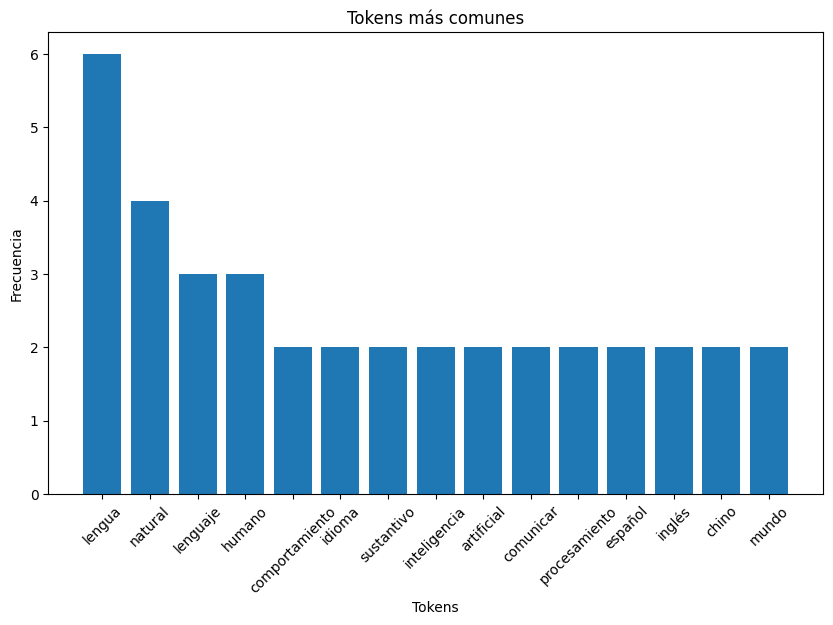

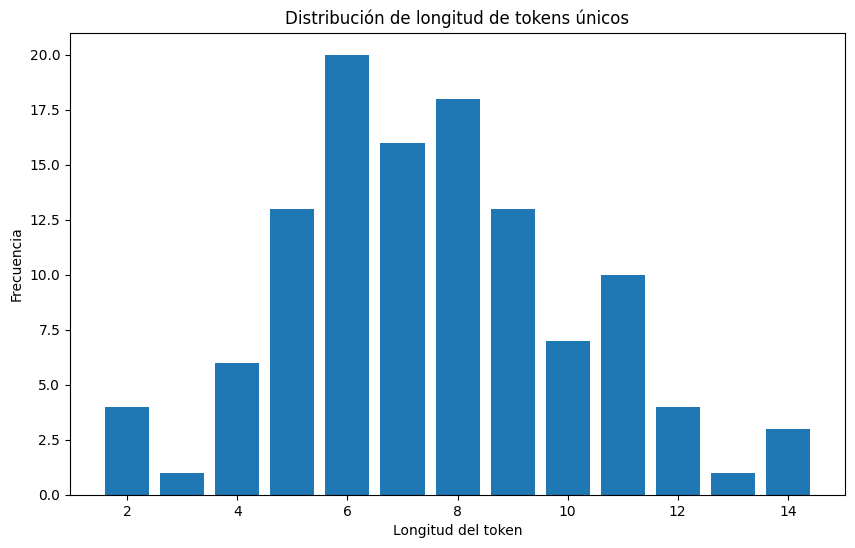

Total tokens:
331

Total tokens únicos:
197


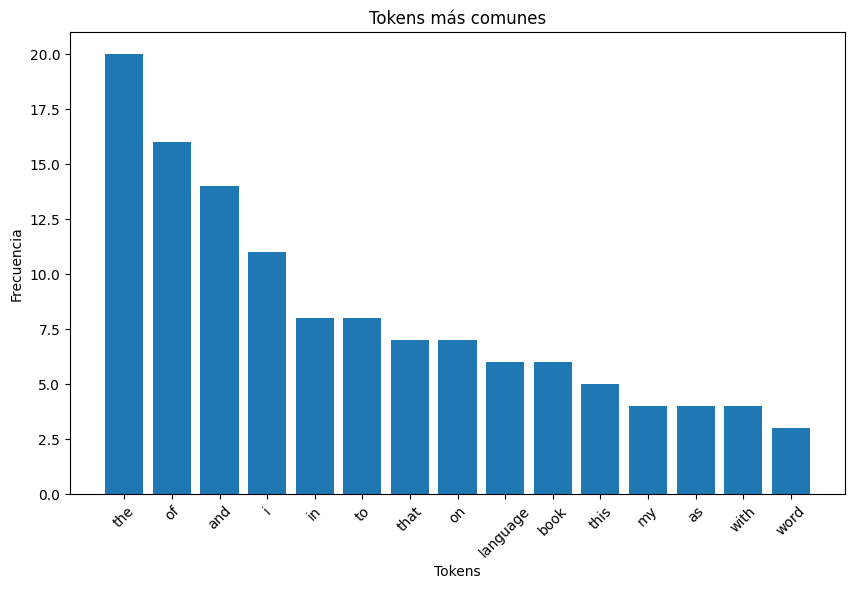

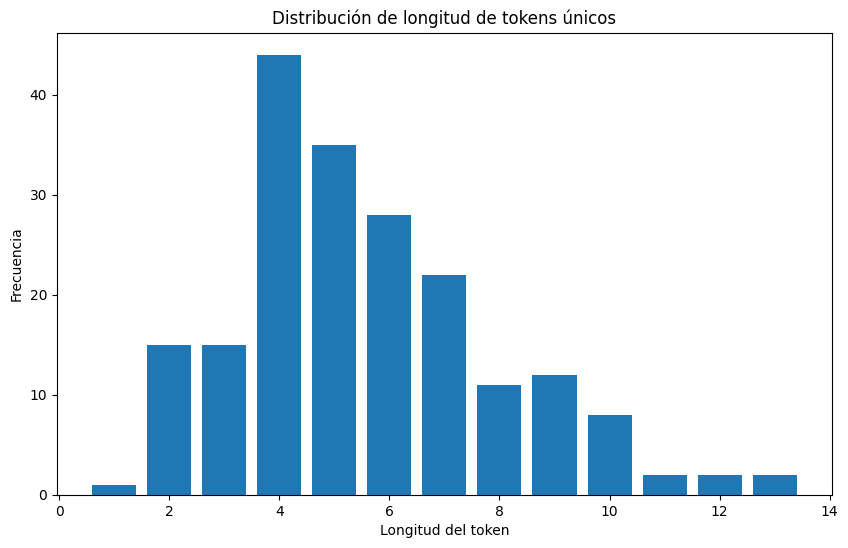

In [22]:
def lemmatize_tokens(tokens):
    doc = ' '.join(tokens)  # Convertir la lista de tokens de nuevo a una cadena de texto
    doc = nlp_es(doc)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)  # Convertir la lista de lemas de nuevo a una cadena de texto
resultado_esp = lemmatize_tokens(lemmas_esp)
resultado_eng = lemmatize_tokens(lemmas_eng)

total_tokens_es, num_unique_tokens_es, most_common_tokens_es = exploratory_analysis(resultado_esp, nlp_es)
total_token_en, num_unique_tokens_en, most_common_tokens_en = exploratory_analysis(resultado_eng, nlp_en)